In [86]:
import os
from PIL import Image

# Directory containing the images
directory =os.path.join( os.getcwd(), "full_resInput")

# Output directory for compressed images
output_directory = "low_resInput"
input_path = os.path.join(output_directory)
# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Iterate over all files in the directory
for filename in os.listdir(directory):
    print("prcessing : " + filename)
    # Check if the file is an image 
    if filename.lower().endswith(('.jpg', '.jpeg',)):
        # Open the original image
        original_image = Image.open(os.path.join(directory, filename))
        # Resize from 5760x 3480 the image to the desired dimensions
        compressed_image = original_image.resize((384, 384))
        filename = "low_"+filename
        # Save the compressed image in the output directory
        # if(subdirectory=="input"):
        compressed_image.save(os.path.join(input_path, filename))
        print(os.path.join(input_path, filename))
                # elif (subdirectory=="output"):
                    # compressed_image.save(os.path.join(output_path, filename))
print("done Preprocessing and saving image to Dir Compressed image")


prcessing : 0059.JPG
low_resInput/low_0059.JPG
prcessing : 0110.JPG
low_resInput/low_0110.JPG
prcessing : 0058.JPG
low_resInput/low_0058.JPG
prcessing : 0072.JPG
low_resInput/low_0072.JPG
prcessing : 0107.JPG
low_resInput/low_0107.JPG
prcessing : 0073.JPG
low_resInput/low_0073.JPG
prcessing : 0062.JPG
low_resInput/low_0062.JPG
prcessing : 0074.JPG
low_resInput/low_0074.JPG
prcessing : 0060.JPG
low_resInput/low_0060.JPG
prcessing : 0101.JPG
low_resInput/low_0101.JPG
prcessing : 0061.JPG
low_resInput/low_0061.JPG
prcessing : 0025.JPG
low_resInput/low_0025.JPG
prcessing : 0044.JPG
low_resInput/low_0044.JPG
prcessing : 0047.JPG
low_resInput/low_0047.JPG
prcessing : 0095.JPG
low_resInput/low_0095.JPG
prcessing : 0057.JPG
low_resInput/low_0057.JPG
prcessing : 0109.JPG
low_resInput/low_0109.JPG
prcessing : 0108.JPG
low_resInput/low_0108.JPG
done Preprocessing and saving image to Dir Compressed image


In [87]:
import os
from torchvision.transforms import ToTensor
from PIL import Image
class Dataset():
    def __init__(self, data_path, transform=None):
        # self.input_path = os.path.join(data_path, "input")  # Path to the input data directory
        # self.output_path = os.path.join(data_path, "output")  # Path to the output data directory
        self.file_list = os.listdir(data_path)
        self.transform = transform
        self.filepath = data_path
        print(data_path)
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        input_file_name = self.file_list[idx]
        output_file_name = input_file_name  
        # input and output file names are the same
        input_file_path = os.path.join(self.filepath, input_file_name)
        output_file_path = os.path.join(self.filepath, output_file_name)
        
        
        transform = ToTensor()
        # Load and preprocess the input data
        image = Image.open(input_file_path)
        inputs = transform(image)

        # Load and preprocess the output data
        image = Image.open(output_file_path)
        targets = transform(image)


        return inputs, targets
    


In [88]:
from torch.utils.data import DataLoader
# Define hyperparameters
num_epochs = 1
batch_size = 32
initial_lr = 0.001
data_path =os.path.join( os.getcwd(), "low_resInput")
train_loader = DataLoader(Dataset(data_path), batch_size=batch_size, shuffle=True)
for input,output in train_loader:
    print(input, output)

/Users/felix/Documents/Internship實習/2023工研院/Code/low_resInput
tensor([[[[0.5843, 0.6667, 0.6745,  ..., 1.0000, 1.0000, 1.0000],
          [0.6627, 0.7333, 0.7647,  ..., 1.0000, 1.0000, 1.0000],
          [0.7098, 0.7608, 0.8275,  ..., 1.0000, 1.0000, 0.9961],
          ...,
          [0.2627, 0.2627, 0.2627,  ..., 0.4275, 0.4431, 0.4510],
          [0.2627, 0.2627, 0.2627,  ..., 0.4431, 0.4510, 0.4588],
          [0.2627, 0.2627, 0.2627,  ..., 0.4392, 0.4510, 0.4588]],

         [[0.6157, 0.6980, 0.7098,  ..., 0.9961, 0.9961, 0.9961],
          [0.6902, 0.7647, 0.7961,  ..., 1.0000, 0.9922, 0.9961],
          [0.7255, 0.7804, 0.8471,  ..., 1.0000, 0.9922, 0.9882],
          ...,
          [0.1176, 0.1176, 0.1176,  ..., 0.1059, 0.1098, 0.1176],
          [0.1176, 0.1176, 0.1176,  ..., 0.1020, 0.1020, 0.1098],
          [0.1176, 0.1176, 0.1176,  ..., 0.0902, 0.0941, 0.1020]],

         [[0.5647, 0.6392, 0.6353,  ..., 0.9882, 1.0000, 1.0000],
          [0.6588, 0.7137, 0.7373,  ..., 0.992

In [89]:
import torch
import torch.nn as nn
class FeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FeatureExtractor, self).__init__()
        #! Activation function need to run on Sequantial or not 
        # Feature Extractor in Low-Resolution Branch
        self.conv1a = nn.Sequential(
            nn.Conv2d(in_channels, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv2a = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv3a = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv4a = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
    def forward(self, input):
    # Feature Extractor in Low-Resolution Branch
        conv1a = self.conv1a(input)
        conv2a = self.conv2a(conv1a)
        conv3a = self.conv3a(conv2a)
        conv4a = self.conv4a(conv3a)
        return conv4a


testfile:  low_0044.JPG
(32, 24, 24)


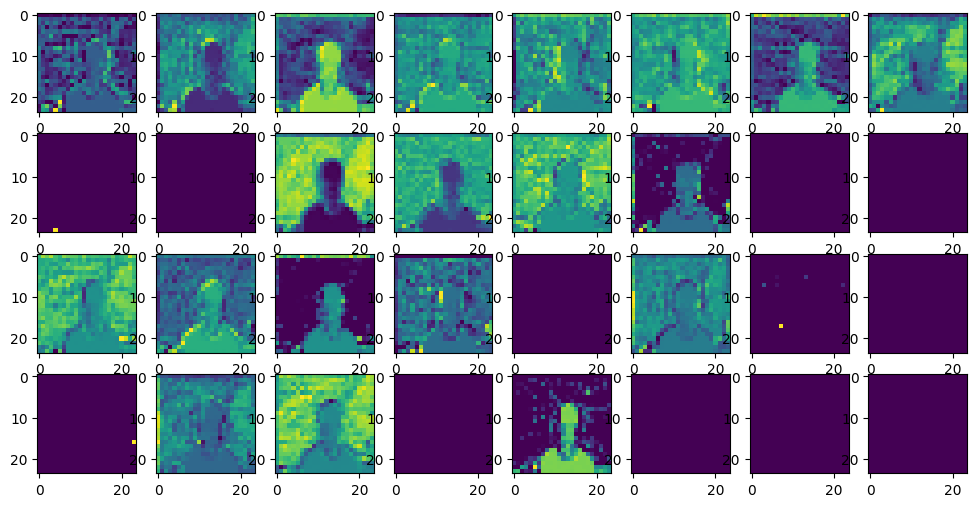

In [90]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

def train(model, train_loader, device):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
    return 

# Create the Network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = FeatureExtractor(3,32)
model = net.to(device)
for epoch in range(num_epochs):
    train(model, train_loader , device)

def get_test_file(data_path):
    for temp in os.listdir(data_path):
        # use 0044 as test file 
        if(temp=="low_0044.JPG"):
            return temp



transform = ToTensor()
# Load and preprocess the input data
test_dataPath = os.path.join(os.getcwd(), "low_resInput")
test_dataName=get_test_file(test_dataPath)
print("testfile: ", test_dataName)
inputs=Image.open(os.path.join(test_dataPath, test_dataName))
inputs = transform(inputs)
feature_maps = model(inputs)  

# Convert the tensor to a numpy array
feature_maps = feature_maps.detach().numpy()
print(feature_maps.shape)

# Plot the feature maps
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[i])
plt.show()
       